<h1 align="center" style="font-family:courier; background-color:powderblue;"> Student Name : Sartaj Ahmed Salman  </h1> 
<h2 align="center" style="background-color:lightgray;"> Email: s2140019@edu.cc.uec.ac.jp  </h2>                              
<h3 align="center" style="background-color:lightgray;" >Phd Student At UEC Tokyo, Japan</h3> 

<h2 align="center" style="font-family:courier; background-color:powderblue;"> Address:    From Skardu, Pakistan </h2> 

# ANOVA 
Analysis of Variance



In [2]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
# Data thon k jo data tha us me sy 30000 sample lea hain taki as a real dataset is pay kam kr skain 
data = pd.read_csv('Sample.csv')
data.head()

,purchase_days_before_daprture,airline,baggage_weight,baggage_pieces,price
0,0,alpha,0.000000,0,8739.0
1,4,beta,0.444444,0,10088.0
2,2,beta,0.444444,0,7350.0
3,12,beta,0.888889,0,9684.0
4,17,gamma,0.444444,1,7765.0


C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='price'>

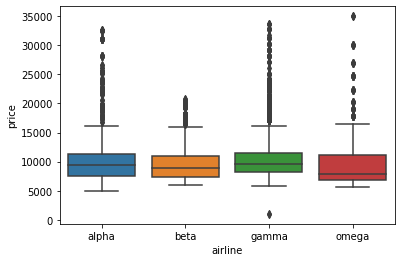

In [4]:
sns.boxplot('airline', 'price', data = data) # Comparison between categorical classes 

In [5]:
data.describe()

,purchase_days_before_daprture,baggage_weight,baggage_pieces,price
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,15.589133,0.505014,0.947567,10148.610833
std,18.949462,0.197538,0.605444,3455.986201
min,0.000000,0.000000,0.000000,1000.000000
25%,4.000000,0.444444,1.000000,7796.000000
50%,10.000000,0.444444,1.000000,9403.000000
75%,20.000000,0.711111,1.000000,11245.000000
max,279.000000,1.000000,2.000000,35000.000000


In [6]:
# Stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols


In [7]:
# One Way ANOVA 
mod = ols('price ~ airline', data = data).fit()

### Anova test k 3 types hain 1,2,3 so is me jo type likhty hain hm wo anova k type ko zahir krta hai k kis type ko use krna hai hm ny or ya sum of squares ko count krny k different ways hain .

In [8]:
aov_table = sm.stats.anova_lm(mod, type=2)
print(aov_table)

               df        sum_sq       mean_sq          F        PR(>F)
airline       3.0  2.134842e+09  7.116141e+08  59.931129  1.274495e-38
Residual  29996.0  3.561684e+11  1.187386e+07        NaN           NaN


In [9]:
# Pair wise comparison 
pair_t = mod.t_test_pairwise('airline', method='bonferroni')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
beta-alpha,-504.093699,55.248662,-9.124089,7.674131e-20,-612.383456,-395.803942,4.604478e-19,True
gamma-alpha,264.595854,45.223074,5.850904,4.939824e-09,175.956681,353.235027,2.963894e-08,True
omega-alpha,-57.626088,116.863942,-0.493104,6.219427e-01,-286.684449,171.432273,1.000000e+00,False
gamma-beta,768.689553,57.366743,13.399568,7.971448e-41,656.248265,881.130840,4.782869e-40,True
omega-beta,446.467611,122.077835,3.657237,2.553843e-04,207.189796,685.745427,1.532306e-03,True
omega-gamma,-322.221942,117.880065,-2.733473,6.270705e-03,-553.271946,-91.171937,3.762423e-02,True


In [10]:
# Pair wise comparison 
pair_t = mod.t_test_pairwise('airline', method='sidak')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
beta-alpha,-504.093699,55.248662,-9.124089,7.674131e-20,-612.383456,-395.803942,4.604478e-19,True
gamma-alpha,264.595854,45.223074,5.850904,4.939824e-09,175.956681,353.235027,2.963894e-08,True
omega-alpha,-57.626088,116.863942,-0.493104,6.219427e-01,-286.684449,171.432273,9.970802e-01,False
gamma-beta,768.689553,57.366743,13.399568,7.971448e-41,656.248265,881.130840,4.782869e-40,True
omega-beta,446.467611,122.077835,3.657237,2.553843e-04,207.189796,685.745427,1.531328e-03,True
omega-gamma,-322.221942,117.880065,-2.733473,6.270705e-03,-553.271946,-91.171937,3.703931e-02,True


In [11]:
# Tucky HSD test 
import pingouin as pg 
# First calculate anova table 
aov = pg.anova(data = data , dv = 'price', between='airline', detailed=True)
print(aov)

    Source            SS     DF            MS          F         p-unc  \
0  airline  2.134842e+09      3  7.116141e+08  59.931129  1.274495e-38   
1   Within  3.561684e+11  29996  1.187386e+07        NaN           NaN   

        np2  
0  0.005958  
1       NaN  


In [12]:
# Tuckey test 
pt = pg.pairwise_tukey(data = data , dv = 'price', between='airline')
print(pt)

       A      B       mean(A)       mean(B)        diff          se  \
0  alpha   beta  10151.518676   9647.424977  504.093699   55.248662   
1  alpha  gamma  10151.518676  10416.114530 -264.595854   45.223074   
2  alpha  omega  10151.518676  10093.892589   57.626088  116.863942   
3   beta  gamma   9647.424977  10416.114530 -768.689553   57.366743   
4   beta  omega   9647.424977  10093.892589 -446.467611  122.077835   
5  gamma  omega  10416.114530  10093.892589  322.221942  117.880065   

           T       p-tukey    hedges  
0   9.124089  8.140155e-12  0.146284  
1  -5.850904  2.961488e-08 -0.076784  
2   0.493104  9.606526e-01  0.016722  
3 -13.399568  8.140155e-12 -0.223067  
4  -3.657237  1.457173e-03 -0.129552  
5   2.733473  3.184140e-02  0.093504  


In [38]:
pvalues =pt['p-tukey']
formated_pvalues =[f'p={pvalue:.2e}' for pvalue in pvalues]

In [40]:
formated_pvalues

['p=8.14e-12',
 'p=2.96e-08',
 'p=9.61e-01',
 'p=8.14e-12',
 'p=1.46e-03',
 'p=3.18e-02']

In [46]:
from statannotations.Annotator import Annotator
plotting_parameters = {
    'data':    data,
    'x':       'airline',
    'y':       'price',
    
}

pairs = [('alpha', 'beta'),
         ('alpha', 'gamma'),
         ('alpha', 'omega'),
         ('beta', 'gamma'),
         ('beta', 'omega'),
         ('gamma', 'omega')]

C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

alpha vs. beta: p=8.14e-12
beta vs. gamma: p=8.14e-12
gamma vs. omega: p=3.18e-02
alpha vs. gamma: p=2.96e-08
beta vs. omega: p=1.46e-03
alpha vs. omega: p=9.61e-01


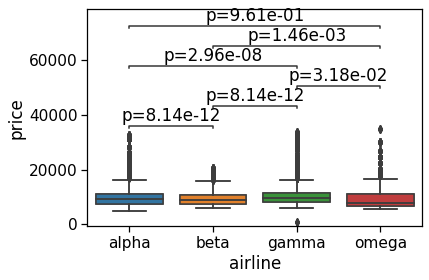

In [47]:
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    ax = sns.boxplot('airline', 'price', data = data)

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_custom_annotations(formated_pvalues)
    annotator.annotate()

    # Label and show
    
    plt.show()

C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

alpha vs. beta: Custom statistical test, P_val:8.140e-12
beta vs. gamma: Custom statistical test, P_val:8.140e-12
gamma vs. omega: Custom statistical test, P_val:3.184e-02
alpha vs. gamma: Custom statistical test, P_val:2.961e-08
beta vs. omega: Custom statistical test, P_val:1.457e-03
alpha vs. omega: Custom statistical test, P_val:9.607e-01


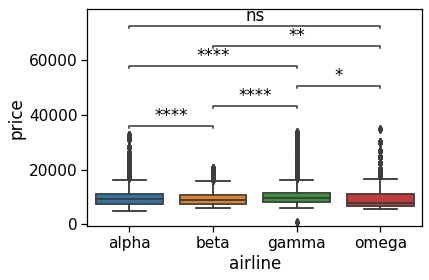

In [48]:
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    ax = sns.boxplot('airline', 'price', data = data)

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    
    plt.show()